# Regression project
## Predicting the number of fatalities from airplane crashes and fatalities

This project has its aims at predicting the number of fatalities of an aircraft accident by fitting a regression model. The dataset can be accessed from the github repository, or from the kaggle: https://www.kaggle.com/datasets/thedevastator/airplane-crashes-and-fatalities

As can be seen below, the data requires much preprocessing before any models can be created. 


Data dictionary:

- index: the index of the row
- Date: the date of the incident
- Time: the time of the incident
- Location: the location of the incident
- Operator: the operator of the aircraft
- Flight #: the flight number of the aircraft
- Route: the route of the aircraft
- Type: the type of aircraft
- Registration: the registration of the aircraft
- cn/In: the construction number/serial number of the aircraft
- Aboard: the number of people on board the aircraft
- Fatalities: the number of fatalities in the incident
- Ground: the number of people on the ground killed in the incident
- Summary: a summary of the incident

Note to reader: This project was set by Rockborne's advanced data training programme. For this project, the dataset from kaggle was split by the course supervisor- to data and unseen data. With the unseen data, we submit our predictions using our model, which is then evaluated by the course supervisor.

## Data Inspection

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
df = pd.read_csv('Processed_datasets/Airplanes/Airplane_Crashes_and_Fatalities_Since_1908_data.csv')

In [415]:
df.head(20)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
1,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
2,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
3,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
4,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
5,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
6,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
7,11/21/1916,NaN,"Mainz, Germany",Military - German Army,NaN,NaN,Super Zeppelin (airship),NaN,NaN,28.0,27.0,0.0,Crashed in a storm.
8,11/28/1916,23:45,"Off West Hartlepool, England",Military - German Navy,NaN,NaN,Zeppelin L-34 (airship),NaN,NaN,20.0,20.0,0.0,Shot down by British anti-aircraft fire and ai...
9,03/04/1917,NaN,"Near Gent, Belgium",Military - German Army,NaN,NaN,Airship,NaN,NaN,20.0,20.0,0.0,Caught fire and crashed.


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4741 non-null   object 
 1   Time          2741 non-null   object 
 2   Location      4724 non-null   object 
 3   Operator      4726 non-null   object 
 4   Flight #      967 non-null    object 
 5   Route         3196 non-null   object 
 6   Type          4717 non-null   object 
 7   Registration  4441 non-null   object 
 8   cn/In         3643 non-null   object 
 9   Aboard        4722 non-null   float64
 10  Fatalities    4730 non-null   float64
 11  Ground        4721 non-null   float64
 12  Summary       4388 non-null   object 
dtypes: float64(3), object(10)
memory usage: 481.6+ KB


In [417]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [418]:
df.shape

(4741, 13)

In [419]:
df.isnull().sum()


Date               0
Time            2000
Location          17
Operator          15
Flight #        3774
Route           1545
Type              24
Registration     300
cn/In           1098
Aboard            19
Fatalities        11
Ground            20
Summary          353
dtype: int64

In [420]:
df.duplicated().sum()

np.int64(0)

In [421]:
print(df['Location'].unique(),'\n')
print(df['Operator'].unique(),'\n')
print(df['Route'].unique(),'\n')
print(df['Type'].unique(),'\n')
print(df['cn/In'].unique(),'\n')
print(df['Ground'].unique(),'\n')

['AtlantiCity, New Jersey' 'Victoria, British Columbia, Canada'
 'Over the North Sea' ... 'Near Isiro, DemocratiRepubliCongo'
 'AtlantiOcean, 570 miles northeast of Natal, Brazil'
 'Near Port Hope Simpson, Newfoundland, Canada'] 

['Military - U.S. Navy' 'Private' 'Military - German Navy' ...
 'Aerotuy airline' 'Bako Air' 'Strait Air'] 

['Test flight' nan 'Varsovie - Strasbourg - Paris' ... 'Goma - Isiro'
 'Rio de Janeiro - Paris' 'Lourdes de BlanSablon - Port Hope Simpson'] 

['Dirigible' 'Curtiss seaplane' 'Zeppelin L-1 (airship)' ...
 'Pilatus PC-6' 'Mi-35' 'Airbus A330-203'] 

[nan '20' '178' ... '22264/753' '5005' '424'] 

[0.00e+00      nan 1.00e+00 5.00e+00 1.10e+01 2.00e+00 5.20e+01 2.20e+01
 2.00e+01 6.30e+01 3.70e+01 5.80e+01 3.60e+01 1.60e+01 4.00e+00 3.00e+00
 7.00e+00 1.30e+01 8.00e+00 1.00e+01 3.10e+01 8.70e+01 3.30e+01 1.07e+02
 4.40e+01 7.00e+01 1.40e+01 2.40e+01 1.13e+02 1.90e+01 1.20e+01 3.20e+01
 4.00e+01 9.00e+00 4.90e+01 3.50e+01 5.40e+01 1.80e+01 4.50e+01 5.00e+0

### Initial comments

Some features seem to be of no use, namely flight number #, registration and cn/In. 

The time feature contains 2000 null values. The time of day may perhaps have an influence on the probability of an accident occuring (according to https://www.restonyc.com/what-time-of-day-do-most-plane-crashes-occur/). However, as we are trying to predict the number of fatalities of an accident that has already occured, this feature may not be required for the model.

Date may serve as a good feature since aviation has become safer over the past century due to advancement in not only technology but also of safety regulations. 

The 'Type', ground andaboard feature will be the most useful predictor for fatalities.

Location may influence matters as we may expect a crash in the middle of the ocean to lead to more fatalities.

Operator may serve also serve as a key feature, as according to https://pilotinstitute.com/aviation-accident-causes/#key-takeaways-4, general aviation (i.e. private flyers) is significantly more dangerous than commericial aviation as the latter adheres to strict safety standards.

The summary feature column can be used to provide us information on the type of accident that had occured (for example, failed take off, weather related, explosions, etc).

# Feature engineering/ Preprocessing

#### More preproccessing (dropping nulls/ impute)

Features which were dropped were assumed to be irrelevant or simply contained too many nulls.

In [422]:
#creating copy
df_copy = df.copy(deep=True)
# irrelevant features
df = df.drop(['Flight #', 'cn/In', 'Registration','Route'], axis=1)
#Most important features
df.dropna(subset=['Ground','Aboard', 'Location','Type'],how='any', inplace=True)
df = df.drop('Time', axis=1)

#imputing nulls to unkowns

df['Operator'] = df['Operator'].fillna('Unknown')

#dropping nulls from summary and fatalities column 
df.dropna(subset=['Fatalities','Summary'],how='any', inplace=True)

df = df.reset_index(drop=True)
df.isnull().values.any()

np.False_

In [423]:
print(df_copy.shape)
print(df.shape)

(4741, 13)
(4343, 8)


We have had to drop roughly 400 rows worth of data and 5 columns. We are left with 4343 rows which shold be sufficient for training the models. 

### Treating the summary data



In [424]:
#%pip install gensim

In [425]:
'''
# Removing stopwords (words with no semantic meaning such as is, were, he, etc) from summary
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
df['Summary_stopwords'] = [remove_stopwords(i) for i in df['Summary']]

'''


"\n# Removing stopwords (words with no semantic meaning such as is, were, he, etc) from summary\nfrom gensim.parsing.preprocessing import remove_stopwords, preprocess_string\ndf['Summary_stopwords'] = [remove_stopwords(i) for i in df['Summary']]\n\n"

In [426]:
'''TF-IDF (Term Frequency-Inverse Document Frequency) allows us to evaluate how important a word is to a
document in reltation to an entire corpus of docuemnts.

from sklearn.feature_extraction.text import TfidfVectorizer
summary_list = []
for i in df['Summary_stopwords']:
    summary_list.append(i)

'''

"TF-IDF (Term Frequency-Inverse Document Frequency) allows us to evaluate how important a word is to a\ndocument in reltation to an entire corpus of docuemnts.\n\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nsummary_list = []\nfor i in df['Summary_stopwords']:\n    summary_list.append(i)\n\n"

In [ ]:
'''We set max features to 500 to reduce dimensionality. Words that appear less than
five times are removed as they reflect words that are too rare. Words that appear in over
85% of all documents are also removed as they are too common (could be stopwords that slipped through)
tfidf = TfidfVectorizer( min_df=5, max_df=0.85)
result = tfidf.fit_transform(summary_list)
'''

#Update: we decided to use sentenceTransformer instead as it is not only more powerful (as it captures contextual
#meaning, but also means we will not have to compute before training then after training).

from sentence_transformers import SentenceTransformer


model = SentenceTransformer('all-MiniLM-L6-v2')
summary_embeddings = model.encode(df['Summary'])


Loading weights: 100%|██████████| 103/103 [00:00<00:00, 1069.81it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [428]:
'''After fitting TF-IDF, we have the issue of data sparcity (i.e.there are too many 
zeroes in the vector, such that the result will lead to overfitting) [Note: we decided to
use SentenceTransformers instead of TF-IDF. We still need to reduce dimensions however]. To deal with this,
we can utilise LSA (latent semantic analysis) which is similar to principle component analysis.
LSA reduces dimensionality of the text data via Singular Value Decomposition (SVD). After this,
the LSA algorithm plots the summaries in to a vector space, and are then compared to each component
of the SVD component via the consine similarity score. More can be found on:
https://www.ibm.com/think/topics/latent-semantic-analysis
Note: this step has to be done after train-test split. We conduct it below so that we can do visual EDA.'''


from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
result_reduced = svd.fit_transform(summary_embeddings)

In [429]:
summary_LSA = pd.DataFrame(result_reduced)

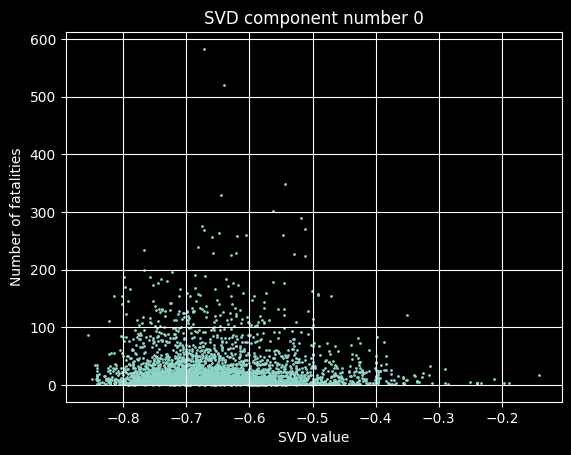

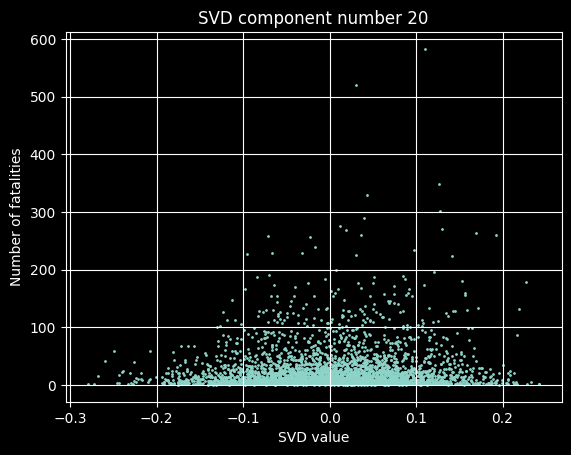

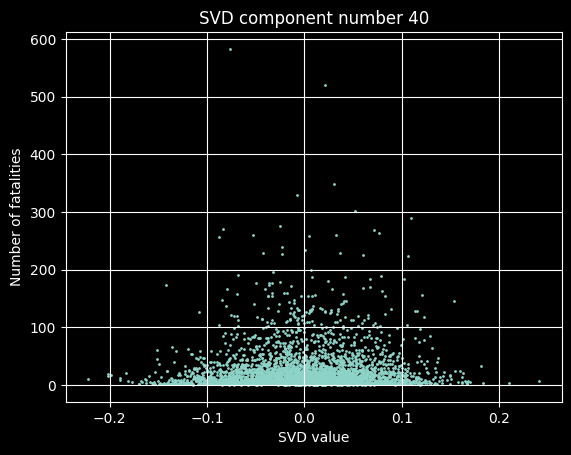

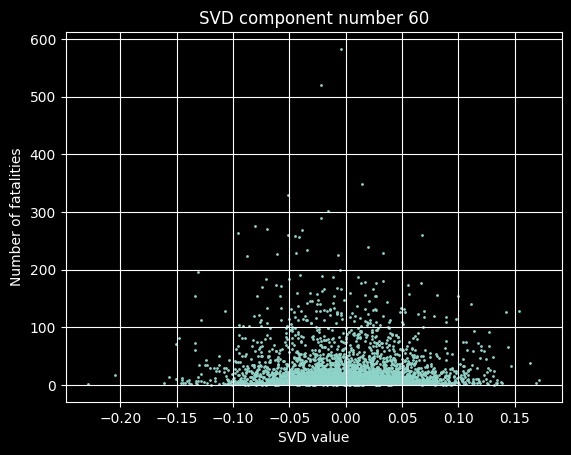

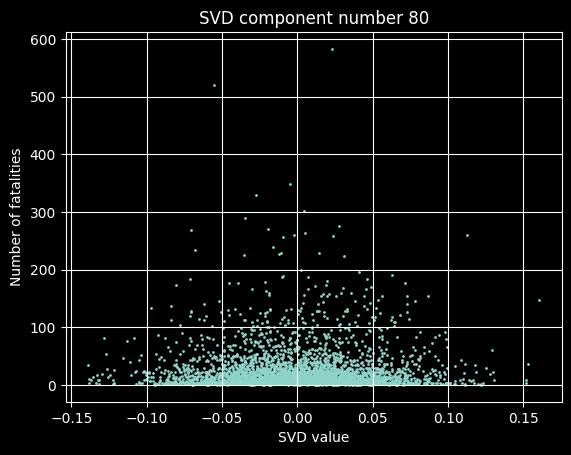

In [430]:

for i in range(0,100,20):
    plt.style.use('dark_background')
    #cmap = plt.get_cmap('Dark2')
    plt.figure()
    plt.scatter(summary_LSA.iloc[:,i], df['Fatalities'], s = 1)
    plt.xlabel("SVD value")
    plt.ylabel("Number of fatalities")
    plt.title(f"SVD component number {i}")
    plt.grid()

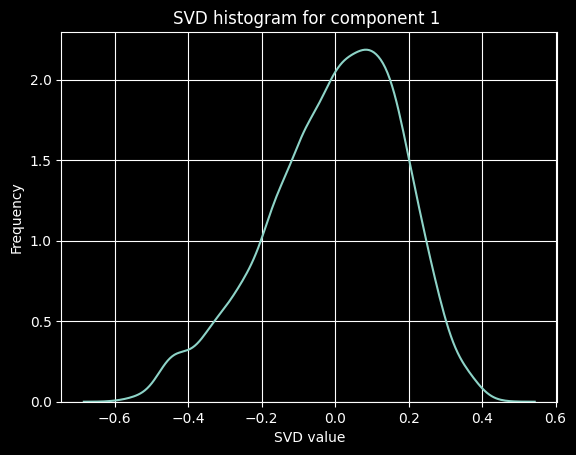

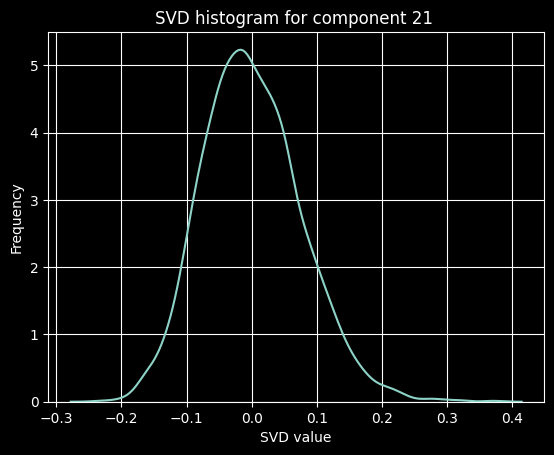

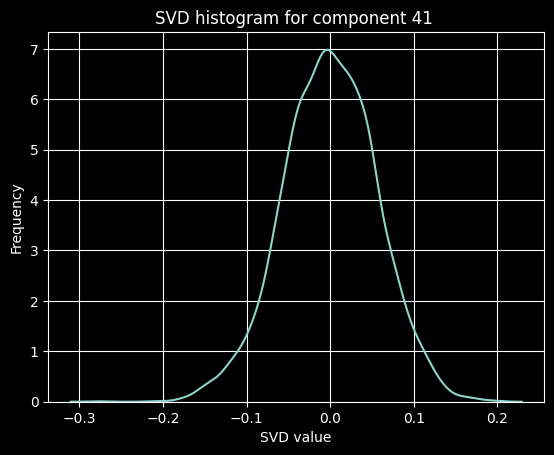

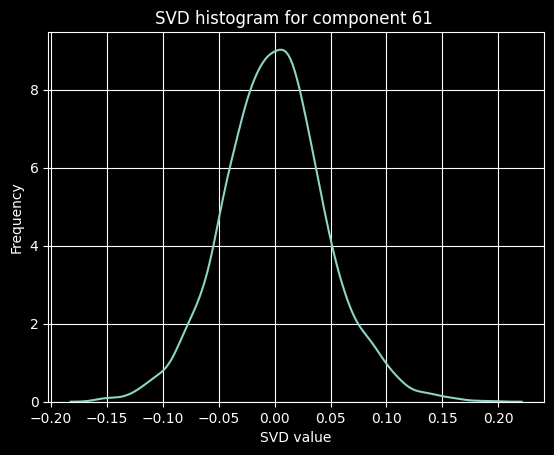

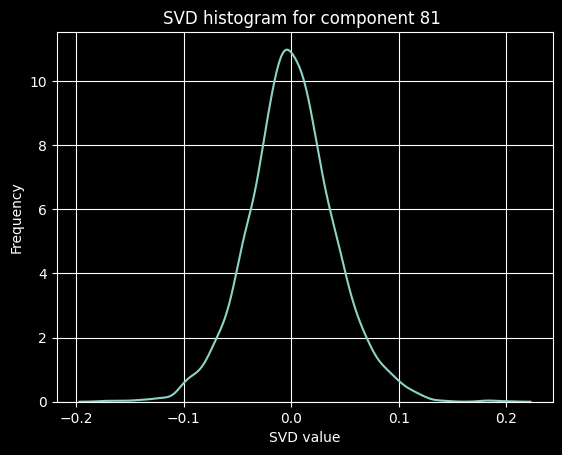

In [431]:
for i in range(1,100,20):
    plt.style.use('dark_background')
    #cmap = plt.get_cmap('Dark2')
    plt.figure()
    sns.kdeplot(summary_LSA.iloc[:,i])
    plt.xlabel("SVD value")
    plt.ylabel("Frequency")
    plt.title(f"SVD histogram for component {i} ")
    plt.grid()

#### Comments on relationship between fatalities and SVD components and SVD histograms

We notice in all the graphs the presence of a reocurring pattern which resembles a bell shape distribution which seems to be centered at 0.00. Thus it may be worth exploring how the model performs when taking the absolute value of the SVD component scores so as to make it more suitable for linear regression. The first plot has a distinctive negative skew. The SVD histogram based are normally distributed.

## Extracting continuous time features from the data column

One hot encoding time will lead to an increased dimensionality and will also lead to loss of information (i.e the order of time). The year will be grouped by their nearest decade.

In [432]:
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['decade'] = (df['year'] // 10) * 10

In [433]:
df['Location'].value_counts().tail(100)

Location
Near Port Heiden, Alaska              1
Mbeya, Tanzania                       1
Off Parepare, Indonesia               1
Matabwe, Tanzania                     1
Near Balad Air Base, Iraq             1
                                     ..
Kewanee, Illinois                     1
Bueren, Germany                       1
Springfield, Ohio                     1
Tambo, Qld, Australia                 1
Victoria, British Columbia, Canada    1
Name: count, Length: 100, dtype: int64

In [434]:
df['Operator'].value_counts().tail(300)

Operator
Charter - Aerotaxi       1
Priorty Air Charter      1
FAMA (Argentina)         1
Tadair                   1
Air China                1
                        ..
Interstate Airlines      1
Commercial Airways       1
New Standard Airlines    1
Bruning Aviation         1
Franco-Roumaine          1
Name: count, Length: 300, dtype: int64

In [435]:
df['Type'].value_counts().tail(200)

Type
Mil Mi-26                                   1
de Havilland Canada DHC-6-300 Twin Otter    1
Lockheed 18-56 Lodestar                     1
PA-34-220T Seneca III                       1
ATR 42-300                                  1
                                           ..
Fokker (KLM)  F.III                         1
Dirigible ZR-1 Shenandoah (airship)         1
Avro  685 York I                            1
Sikorsky S-25                               1
Cessna 402A                                 1
Name: count, Length: 200, dtype: int64

### Should we Target encode the type and operator features?
Since the Operator, Location, and type features show very high cardinality, one hot encoding will result in many sparse features, which could lead to overfitting and require too much computational power. Target encoding will be a more suitable alternative. 

### The issue?

As suggested by the value_counts().tail() checks run above, we see a glaring issue- there are many unique values that only appear once, such that setting the setting smooting of target encoding to 'Auto' will not work- in fact would make it worse. Moreover, we can see that, at least with the 'Type' columns, the same aircraft may have slightly different variants, which is likly the most responsible cause for such high cardinality.

### Alternative approach.. sentenceTransformer 

Similar to SVD, we can use sentenceTransformer to embed the text in to a vector space which computes the semantic textual similarity. An advantage behind sentenceTransformer as opposed to TF-IDF (which was originally planned for summary feature data) is that it takes in to account the contextual meaning of a given text and are pretrained on a large training model. We must however be cautious as they are largely optimised for large corpus of text*. After computing the embeddings, we can then use SVD to minimise the dimensionality of the embeddings- note that as sentenceTransformers are pretrained, we do not need to compute embeddings after train test splits as each similarity score computed is with respects to the pretraining corpus. We will however need to do compute SVD (and TF-IDF had we decided to use it) after train-test split.

### Encoding location feature

To 'geoencode' the location feature, we will first compute the latitude and longitudes from the locations given (source:https://www.datacamp.com/tutorial/geocoding-for-data-scientists). As we will want to normalise the data, we will then convert the latitudes and longitudes to x,y,z cordinates (source: https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature).



In [436]:
#%pip install sentence_transformers

In [ ]:
#Creating the embeddings for the type and operator features (Note: we had to repeat this step again below
#as more rows had to be removed following geoencode)

from sentence_transformers import SentenceTransformer


model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed the raw strings
type_embeddings = model.encode(df['Type'].fillna('').tolist())
operator_embeddings = model.encode(df['Operator'].fillna('').tolist())

Loading weights: 100%|██████████| 103/103 [00:00<00:00, 1111.96it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
#Computing latitude and longitude for location feature


GM_API_KEY = 'API KEY'
from geopy.geocoders import GoogleV3
geolocator = GoogleV3(api_key=GM_API_KEY)





def get_coordinates(location):
    try:
        result = geolocator.geocode(location)
        if result:
            return result.latitude, result.longitude
        else:
            return None, None
    except:
        return None, None


df['latitude'], df['longitude'] = zip(*df['Location'].apply(
    lambda x: get_coordinates(x)
))


In [465]:
df.isnull().sum()

Date             0
Location         0
Operator         0
Type             0
Aboard           0
Fatalities       0
Ground           0
Summary          0
year             0
month            0
decade           0
latitude        25
longitude       25
location_x    1674
location_y    1674
location_z    1674
dtype: int64

In [ ]:
df.dropna(subset=['latitude','longitude'],how='any', inplace=True) #dropped 25 rows

In [467]:
#Saving the dataframe as we used a google api to compute lat and lon
df.to_csv('df_copy.csv', index=False)

In [ ]:
#converting Lat and lon to x,y,z (so that normalisation is possible)
import numpy as np

df['location_x'] = np.cos(df['latitude']) * np.cos(df['longitude'])
df['location_y'] = np.cos(df['latitude']) * np.sin(df['longitude'])
df['location_z'] = np.sin(df['latitude'])

In [5]:
df.isnull().any()

Date          False
Location      False
Operator      False
Type          False
Aboard        False
Fatalities    False
Ground        False
Summary       False
year          False
month         False
decade        False
latitude      False
longitude     False
location_x    False
location_y    False
location_z    False
dtype: bool

## Visual EDA

In [440]:
visual_eda = df[['Date', 'Location','Operator','Type', 'Aboard', 'Fatalities','Ground']]

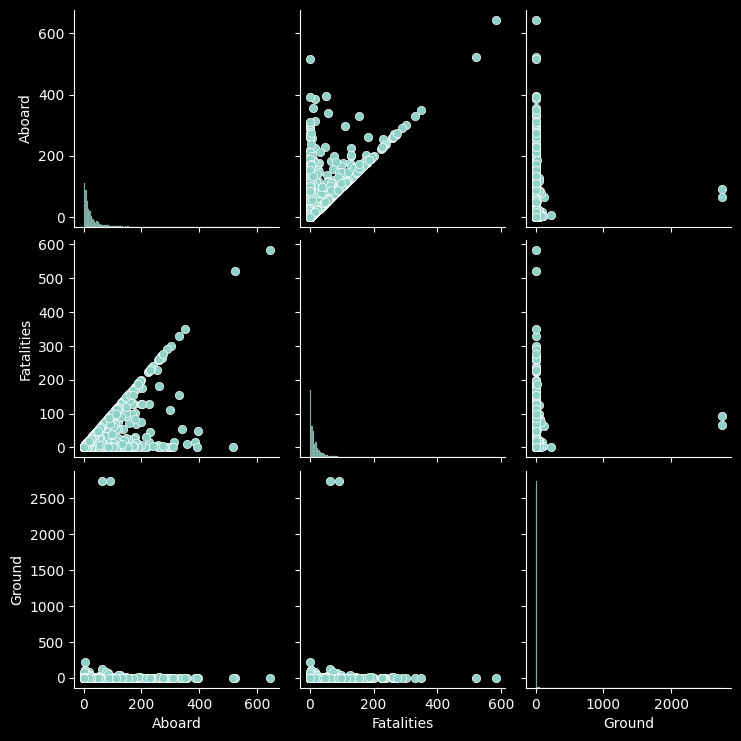

In [441]:
sns.pairplot(visual_eda)

<Axes: >

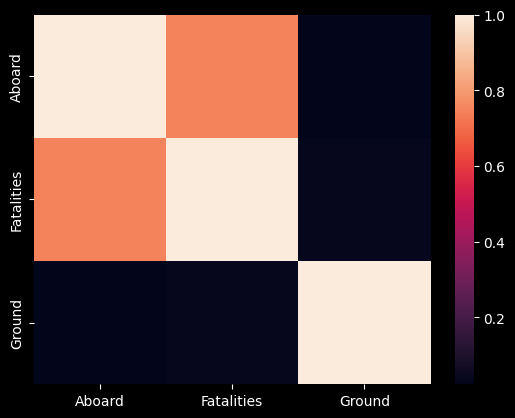

In [442]:
sns.heatmap(visual_eda.corr(numeric_only=True))

#### From the pairplot and correlation heatmap, we can see that fatalities are correlated with the number of people aboard the aircraft. The number of people who were on killed on the Ground does not however affect the number of fatalities.

Text(0.5, 1.0, 'Average Fatalities by Decade')

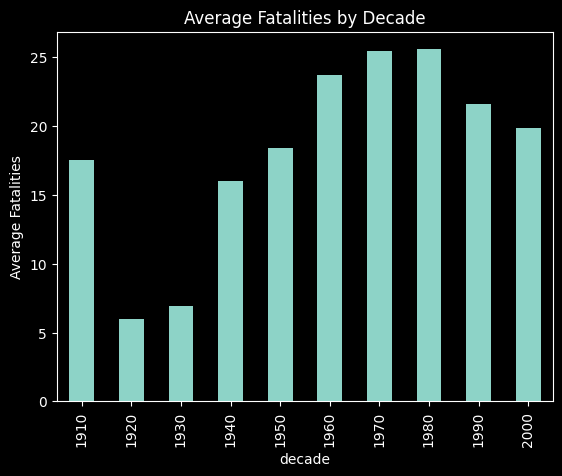

In [443]:
df.groupby('decade')['Fatalities'].mean().plot(kind='bar')
plt.ylabel('Average Fatalities')
plt.title('Average Fatalities by Decade')

Text(0.5, 1.0, 'Average Fatalities by Decade')

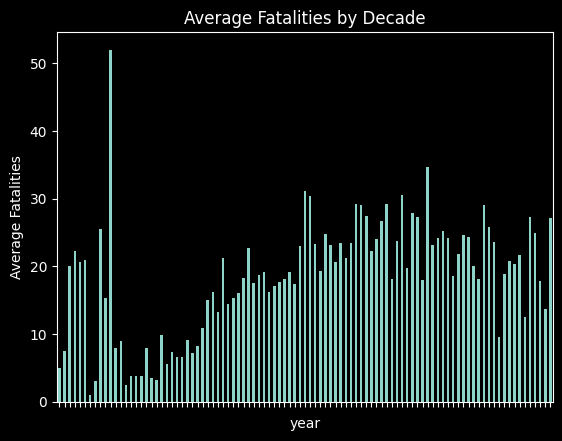

In [444]:
df.groupby('year')['Fatalities'].mean().plot(kind='bar').set(xticklabels=[])
plt.ylabel('Average Fatalities')
plt.title('Average Fatalities by Decade')

Text(0.5, 1.0, 'Fatalities by Decade')

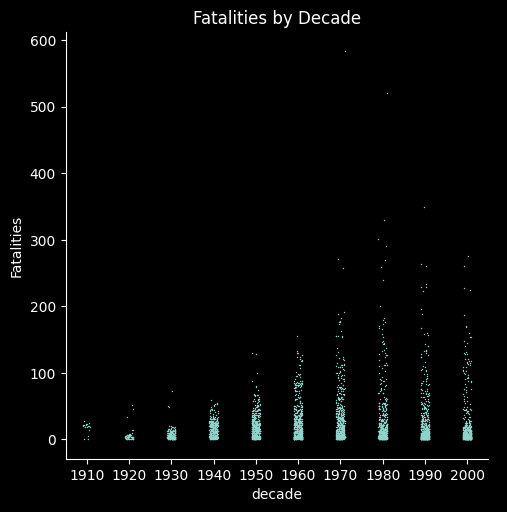

In [445]:
sns.catplot(df, x='decade', y='Fatalities', s= 1)
plt.ylabel('Fatalities')
plt.title('Fatalities by Decade')


Text(0.5, 1.0, 'Average Number of people aboard by Decade')

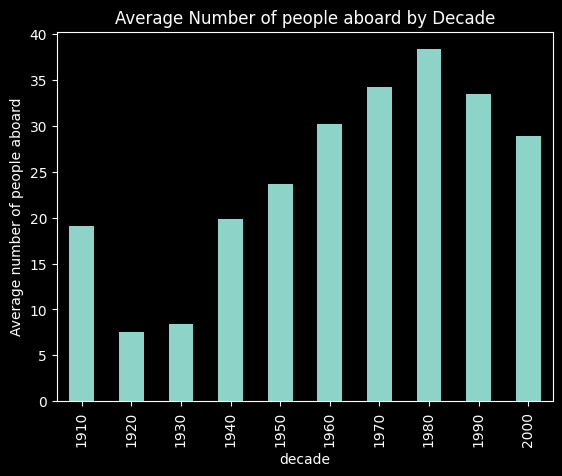

In [446]:
df.groupby('decade')['Aboard'].mean().plot(kind='bar')
plt.ylabel('Average number of people aboard')
plt.title('Average Number of people aboard by Decade')

Text(0.5, 1.0, 'Average Fatalities by Month')

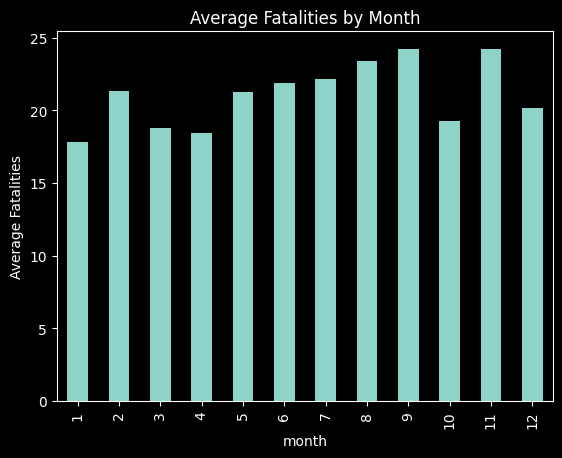

In [447]:
df.groupby('month')['Fatalities'].mean().plot(kind='bar')
plt.ylabel('Average Fatalities')
plt.title('Average Fatalities by Month')

## Comments on the date

When plotting the decade, we can see that there is drop after 1910 (perhaps due to the end of WW1) and then sharp increase again at 1940 (perhaps because of WW2). The mean number of fatalities continues to increase after this period, and this most likly because of the development of newer aircraft that are able to carry more people, as confirmed in the graph showing the average number of people aboard per decade. In fact, the distribution of both graphs are very similar, which would indicate that the decade serves as a proxy for the advancement of larger aircraft. The plot showing the average fatality per year is mor vulnerable to outliers, as suggested by the large peaks- thus using year as opposed to the decade may cause overfitting of the data.

The average fatality per month does seem to show a very weak seasonal trend, however since it is hard to see a causal link between the two, it doesn't make sense to include this as feature.

In [470]:
import plotly.express as px
fig = px.scatter_mapbox(
df,
lat="latitude",
lon="longitude",
hover_name="Location", # Optional column for hover info
zoom=5,
height=600,
width=800,
mapbox_style="open-street-map"
)
fig.show()


C:\Users\rahma\AppData\Local\Temp\ipykernel_20112\3724325501.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



#### The map above shows the estimated location of each incident, by converting the locations to latitude and longitude using openstreetmap api. We can see that many of the incidents seem to distributed at Western Europe and the East coast of the USA, and seemingly quite at the Northern part of South America.

# Joining the data all together

For us to be able to carry out SVD, we will have to make note of the columns for all the embeddings.

In [ ]:

df_copy2 = df.copy()

In [7]:
df.columns

Index(['Date', 'Location', 'Operator', 'Type', 'Aboard', 'Fatalities',
       'Ground', 'Summary', 'year', 'month', 'decade', 'latitude', 'longitude',
       'location_x', 'location_y', 'location_z'],
      dtype='object')

In [ ]:
df = df.drop(['Date', 'Location','Operator','Type','Summary','year','month','latitude','longitude'], axis=1)
#changing column orders so that fatalities is last 
df = df[['Aboard', 'Ground', 'decade', 'location_x','location_y','location_z','Fatalities']]

In [10]:
#Computing embeddings again as we had remove rows after processing location data
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import TruncatedSVD
model = SentenceTransformer('all-MiniLM-L6-v2')
summary_embeddings = model.encode(df_copy2['Summary'].fillna('').tolist())
type_embeddings = model.encode(df_copy2['Type'].fillna('').tolist())
operator_embeddings = model.encode(df_copy2['Operator'].fillna('').tolist())

summary_df = pd.DataFrame(summary_embeddings)
type_df = pd.DataFrame(type_embeddings)
operator_df = pd.DataFrame(operator_embeddings)

print(summary_df.shape)
print(type_df.shape)
print(operator_df.shape)

#THE FIRST 384 COLUMNS: summary embeddings
#THE SECOND 384 COLUMNS: type embeddings
#THE THIRD 384 COLUMNS: operator embeddings

c:\Users\rahma\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 103/103 [00:00<00:00, 504.78it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


(4318, 384)
(4318, 384)
(4318, 384)


In [ ]:



#concating embeddings
embedding_df = pd.concat([summary_df, type_df,operator_df], axis=1) 
df = pd.concat([embedding_df,df],axis=1)


In [13]:
#dropping the nulls that emerged from embedding
df.dropna(how='any', inplace=True)

In [ ]:
# WE ARE NOW READY FOR MODELLING
#saving another file in case we need to restart kernel

#df.to_csv('df_processed.csv')

In [489]:
df.shape

(4293, 1159)

# Data modelling

## Model 1: Lasso regression 

In [22]:
#train test-split and imports

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:1158]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define which columns belong to each embedding
summary_cols = [col for col in range(0, 384)]        # first 384 columns
type_cols = [col for col in range(384, 768)]          # next 384 columns
operator_cols = [col for col in range(768, 1152)]     # last 384 columns

# Apply SVD independently to each embedding block
preprocessor = ColumnTransformer([
    ('summary_svd', Pipeline([
        ('svd', TruncatedSVD(n_components=50)),
        ('scaler', StandardScaler())
    ]), summary_cols),
    
    ('type_svd', Pipeline([
        ('svd', TruncatedSVD(n_components=50)),
        ('scaler', StandardScaler())
    ]), type_cols),
    
    ('operator_svd', Pipeline([
        ('svd', TruncatedSVD(n_components=50)),
        ('scaler', StandardScaler())
    ]), operator_cols),
], remainder='passthrough')  # passthrough keeps year, lat, lon etc unchanged

# Full pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor), ('scaler', StandardScaler()),
    ('model', Lasso())
])

param_grid = {'model__alpha': [0,0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
#We have to convert to numpy as we cant have column names which are integers  (got to be strings only)
grid_search.fit(X_train.to_numpy(), y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)


{'model__alpha': 0.1}
0.532866962544258
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('summary_svd',
                                                  Pipeline(steps=[('svd',
                                                                   TruncatedSVD(n_components=50)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...]),
                                                 ('type_svd',
                                                  Pipeline(steps=[('svd',
       

In [18]:
#Evaluating test data
from sklearn.metrics import mean_absolute_error

def model_eval(pipe, X_train=X_train.to_numpy(), X_test=X_test.to_numpy(), y_train=y_train, y_test=y_test):
    '''A function that lets us quickly evaluate models'''
    pipe.fit(X_train, y_train)
    Y_pred = pipe.predict(X_test)
    mse1 = mean_squared_error(y_test, Y_pred)
    rmse1 = np.sqrt(mse1)
    r_squared1 = r2_score(y_test, Y_pred)
    mae1 = mean_absolute_error(y_test, Y_pred)
    print('MSE: ',mse1)
    print('RMSE: ', rmse1)
    print('MAE: ', mae1)
    print('R2:',r_squared1)





In [65]:
pipe = Pipeline([
    ('preprocessor', preprocessor), ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.1))
])

model_eval(pipe)

MSE:  474.67356032402995
RMSE:  21.78700439078374
MAE:  11.175827136838835
R2: 0.6612317161754275


## Model evalaution
Having tested the model, we see that the R2 computed using the test data is actually higher than R2 outputted during the cross validation above (0.66 compared to 0.51).

# Model 2: SVR (Support Vector Regression)

## Model 2.1: linear SVR

In [ ]:

from sklearn.svm import LinearSVR as LSVR
# Full pipeline
pipe_LSVR = Pipeline([
    ('preprocessor', preprocessor), ('scaler', StandardScaler()),
    ('model', LSVR())
])

param_grid = {    'model__C': [0.1, 1, 10, 100, 1000],
    'model__epsilon': [0.01, 0.1, 0.5, 1, 2], 
    }

grid_search = GridSearchCV(pipe_LSVR, param_grid=param_grid, cv=5, 
                                 scoring='r2', n_jobs=-1)
#We have to convert to numpy as we cant have column names which are integers  (got to be strings only)
grid_search.fit(X_train.to_numpy(), y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'model__C': 0.1, 'model__epsilon': 2}
0.5155650240659349
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('summary_svd',
                                                  Pipeline(steps=[('svd',
                                                                   TruncatedSVD(n_components=50)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...]),
                                                 ('type_svd',
                                                  Pipeline(step

In [67]:
pipe_LSVR = Pipeline([
    ('preprocessor', preprocessor), ('scaler', StandardScaler()),
    ('model', LSVR(C=0.1, epsilon=2))
])
model_eval(pipe_LSVR)

MSE:  446.07474046248325
RMSE:  21.12048153955026
MAE:  8.956009940326956
R2: 0.6816423181842914


### Model evaluation:
Linear SVR performs better than lasso regression, with a slightly better R2 score and noticably lower MSE, indicating perhaps better robustness to outliers.

## Model 2.2: Radial kernel SVR

In [ ]:

from sklearn.svm import SVR
# Full pipeline
pipe_SVR_RBF = Pipeline([
    ('preprocessor', preprocessor), ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf'))
])

param_grid = {    'model__C': [0.1, 1, 10, 100, 1000],
    'model__epsilon': [0.01, 0.1, 0.5, 1, 2], 
    'model__gamma':['scale', 'auto', 1e-2, 1e-1]}

grid_search = GridSearchCV(pipe_SVR_RBF, param_grid=param_grid, cv=5, 
                                 scoring='r2', n_jobs=-1)
#We have to convert to numpy as we cant have column names which are integers  (got to be strings only)
grid_search.fit(X_train.to_numpy(), y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'model__C': 100, 'model__epsilon': 0.01, 'model__gamma': 'auto'}
0.5410460844673034
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('summary_svd',
                                                  Pipeline(steps=[('svd',
                                                                   TruncatedSVD(n_components=50)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...]),
                                                 ('type_svd',
                                    

In [61]:
pipe_SVR_RBF = Pipeline([
    ('preprocessor', preprocessor), ('scaler', StandardScaler()),
    ('model', SVR(kernel='rbf', gamma='auto',epsilon=0.01,C=100))
])

model_eval(pipe_SVR_RBF)

MSE:  588.1945343804973
RMSE:  24.25272220556895
MAE:  10.12338916869525
R2: 0.5802132884101421


#### Comparing SVR to lasso regression & linear SVR, we see that the R2 score is lower when compututed on the test data. However, the the cross validation results show that SVR outputs a slightly higher score. Another thing to note is that the MAE is lower in SVR than lasso/linear SVR, and the MSE is higher- perhaps this indicates that the SVR is more sensitive to outliers.

## Model 3: Gradient boosted regression

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor as GBR #use HistGradientBoostingRegressor as its more faster
# Full pipeline
pipe_GBR = Pipeline([
    ('preprocessor', preprocessor), ('scaler', StandardScaler()),
    ('model', GBR())
])

param_grid = {
    'model__max_iter': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(pipe_GBR, param_grid=param_grid, cv=5, 
                                 scoring='r2', n_jobs=-1)
#We have to convert to numpy as we cant have column names which are integers  (got to be strings only)
grid_search.fit(X_train.to_numpy(), y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__max_iter': 50}
0.5827195027089879
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('summary_svd',
                                                  Pipeline(steps=[('svd',
                                                                   TruncatedSVD(n_components=50)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...]),
                                                 ('type_svd',
                          

In [87]:
pipe_GBR = Pipeline([
    ('preprocessor', preprocessor), ('scaler', StandardScaler()),
    ('model', GBR(learning_rate=0.1,max_depth=7,max_iter=200))
])

model_eval(pipe_GBR)

MSE:  600.8224482803404
RMSE:  24.511679833914695
MAE:  8.232026102518457
R2: 0.5712009121631607


#### GBR performs slightly worse than SVR, though out of all the models tested, has the lowest MAE. 

#### What is most interesting is that the R2 computed from the CV was higher compared to both lasso and linearSVC. In addition, the fact that the linear models showed a rapid jump in the R2 values when evaluated on the test seems suspect- perhaps a sign of model instability. To further scrutinise the model, we will compute cross validation scores using the entire dataset and computing the standard deviations for all models.

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
#We use k = 30 to minimize the variance of the performance
def cross_val(pipe, X,y):
    cv = KFold(n_splits=30, shuffle=True, random_state=42)
    scores = cross_val_score(pipe, X, y, cv=cv, scoring='r2')
    print(f"Cross-validation R2 scores: {scores}")
    print(f"Mean CV R2: {np.mean(scores):.4f}")
    print(f"Median CV R2: {np.median(scores):.4f}")
    print(f"Standard deviation of CV R2: {np.std(scores):.4f}")

In [92]:
#evaluating Linear SVR
cross_val(pipe_LSVR,X.to_numpy(),y)

Cross-validation R2 scores: [ 0.79623217  0.61276044  0.08075587  0.67134763  0.76548375  0.75494302
  0.83646681  0.89192759  0.87100714  0.73914738  0.3722088   0.4955095
 -0.06343794  0.53974156  0.82491394  0.7361432  -0.15717867  0.05533326
  0.28597281  0.67890596  0.79088685  0.23210663  0.27737552  0.60506374
  0.41522556  0.5051879   0.60933991 -0.50637871  0.60570666 -0.16498224]
Mean CV R2: 0.4719
Median CV R2: 0.6054
Standard deviation of CV R2: 0.3552


In [93]:
#evaluating Lasso regression
cross_val(pipe,X.to_numpy(),y)

Cross-validation R2 scores: [ 0.71813309  0.61813518  0.31295864  0.67523465  0.73654391  0.7207847
  0.75400729  0.79324702  0.80831788  0.70550812  0.45473177  0.61956872
  0.25367595  0.61669648  0.76566061  0.73724752  0.12262962  0.24545996
  0.46548468  0.66231611  0.71480778  0.37108237  0.40046105  0.63288083
  0.49334039  0.59503029  0.66591225 -0.06001745  0.61191742  0.12208869]
Mean CV R2: 0.5445
Median CV R2: 0.6189
Standard deviation of CV R2: 0.2242


In [ ]:
cross_val(pipe_SVR_RBF,X.to_numpy(),y) #Result was unstable!

In [94]:
#evaluating GBR
cross_val(pipe_GBR,X.to_numpy(),y)

Cross-validation R2 scores: [ 0.58687234  0.73462048  0.56874052  0.66809214  0.7731957   0.57022847
  0.86062348  0.36654027  0.88585578  0.7891672   0.55550414  0.65636635
  0.46461703  0.4939035   0.68191291  0.80925284  0.37633737  0.68274521
  0.62049685  0.76370252  0.84613841  0.42610131  0.58160909  0.60886322
  0.45905477  0.79404901  0.7716484  -0.05455897  0.68276869  0.26176861]
Mean CV R2: 0.6095
Median CV R2: 0.6384
Standard deviation of CV R2: 0.1991


### Evaluation:

By carrying out cross validation across ten folds on the entire dataset and computing the standard deviations, we see that our supposed best model (linear SVR) actually yielded the highest standard deviation; almost double than the one computed from GBR. Lasso regression did quite better however than the linear SVR model, with a STD of 0.22. 

Overall, we see that Gradient Boosted Regression (GBR) performs the best with the highest median and mean R2 score and lowest standard deviation for R2. Thus, we will use this model.

# Preprocessing unseen datatset 



In [96]:
df2 = pd.read_csv('Processed_datasets/Airplanes/Airplane_Crashes_and_Fatalities_Since_1908_unseen.csv')


# irrelevant features
df2 = df2.drop(['Flight #', 'cn/In', 'Registration','Route'], axis=1)
#Most important features
df2.dropna(subset=['Ground','Aboard', 'Location','Type'],how='any', inplace=True)
df2 = df2.drop('Time', axis=1)

#imputing nulls to unkowns

df2['Operator'] = df2['Operator'].fillna('Unknown')

#dropping nulls from summary and fatalities column 
df2.dropna(subset=['Summary'],how='any', inplace=True)

df2 = df2.reset_index(drop=True)
df2.isnull().values.any()


np.False_

In [ ]:

GM_API_KEY = 'API key'
from geopy.geocoders import GoogleV3
geolocator = GoogleV3(api_key=GM_API_KEY)





def get_coordinates(location):
    try:
        result = geolocator.geocode(location)
        if result:
            return result.latitude, result.longitude
        else:
            return None, None
    except:
        return None, None


df2['latitude'], df2['longitude'] = zip(*df2['Location'].apply(
    lambda x: get_coordinates(x)
))


In [ ]:
df2.dropna(subset=['latitude','longitude'],how='any', inplace=True)
df2['location_x'] = np.cos(df2['latitude']) * np.cos(df2['longitude'])
df2['location_y'] = np.cos(df2['latitude']) * np.sin(df2['longitude'])
df2['location_z'] = np.sin(df2['latitude'])
df_copy2_2 = df2.copy()


In [100]:
df2['year'] = pd.to_datetime(df2['Date']).dt.year
df2['month'] = pd.to_datetime(df2['Date']).dt.month
df2['decade'] = (df2['year'] // 10) * 10
df2 = df2.drop(['Date', 'Location','Operator','Type','Summary','year','month','latitude','longitude'], axis=1)
#changing column orders so that fatalities is last 
df2 = df2[['Aboard', 'Ground', 'decade', 'location_x','location_y','location_z']]

In [101]:
#Computing embeddings again as we had remove rows after processing location data
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import TruncatedSVD
model = SentenceTransformer('all-MiniLM-L6-v2')
summary_embeddings = model.encode(df_copy2_2['Summary'].fillna('').tolist())
type_embeddings = model.encode(df_copy2_2['Type'].fillna('').tolist())
operator_embeddings = model.encode(df_copy2_2['Operator'].fillna('').tolist())

summary_df2 = pd.DataFrame(summary_embeddings)
type_df2 = pd.DataFrame(type_embeddings)
operator_df2 = pd.DataFrame(operator_embeddings)


#concating embeddings
embedding_df2 = pd.concat([summary_df2, type_df2,operator_df2], axis=1) 
df2 = pd.concat([embedding_df2,df2],axis=1)
df2.dropna(how='any', inplace=True)

Loading weights: 100%|██████████| 103/103 [00:00<00:00, 917.00it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
pipe_GBR.fit(X.to_numpy(), y)
Y_pred = pipe_GBR.predict(df2.to_numpy())

In [105]:
predictions = pd.DataFrame(Y_pred)

In [106]:
predictions.to_csv('Aminoor_Rhaman_aviation_prediction.csv')

# Project reflections

## What was learnt:

- Learnt how to geoecode location data by converting to latitude and longitude (using google's geocoding API) and then converting to x,y,z cordinates.

- Learnt about various NLP techniques such as TF-IDF, SentenceTransformers and SVM and applied them to feature engineer textual/categorical data.

- Efficiently managed data modelling pipeline using columntransformers to prevent risk of data leeakage.

- Compared the performance of various models such as SVR (linear and radial kernels), gradient boosted regression and lasso regression. 

- Overall, this project provided a good exposure to the need to apply rigourous data preprocessing and involved heavy feature engineering.

## Areas for future work:

- After computing embeddings for categorical columns, could make an attempt to build text clusters (via kmeans clustering) to reduce the dimensionality of the feature space. Could then apply target encoding to this further engineer the feature. This strategy would minimize the number of features we have in our model and thus minimize the effects (if present) from the curse of dimensionality, which leads to overfitting (perhaps the reason why the radial kernel of SVR struggled).

 - Can try optimizing/tuning the number of components we select for SVD transformations. If that makes gridsearchcv to computationally long to run, can use randomsearchcv instead.

 - Try more models, such as polynomial SVR and random forest regression. Could maybe also try to work with a svr ensemble using the linear kernel and see how it performs.